## EN3160 Assignment 01
#### Intensity Transformations and Neighborhood Filtering

We start by importing the relevant libraries.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Question 01

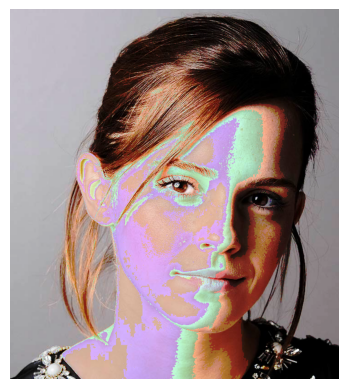

In [15]:
img = cv2.imread("a1images/emma.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

x = np.arange(256, dtype=np.uint8)
x[50:151] = 100 + ((255 - 100) / 100) * (x[50:151] - 50)

img = x[img]

plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()